In [1]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import numpy.random as rnd
import os

# to make this notebook's output stable across runs
seednumber = rnd.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "fundamentals"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

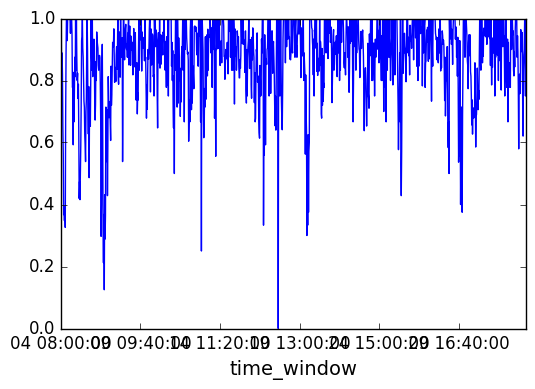

          t-1       t+1
t-1  1.000000  0.556658
t+1  0.556658  1.000000


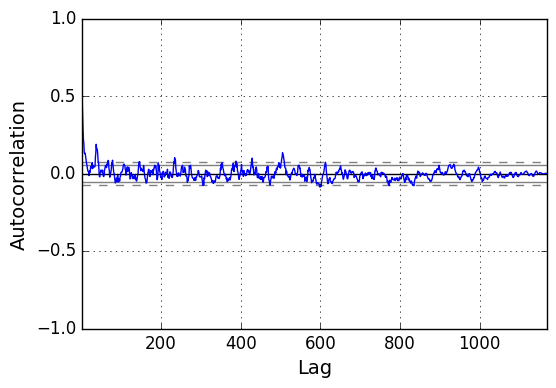

In [155]:
import pandas as pd
import numpy as np
from scipy.stats import kurtosis, skew, mode
from pandas.tools.plotting import lag_plot
from pandas import Series
from pandas import concat
from pandas import DataFrame
from pandas.tools.plotting import autocorrelation_plot

datapath = "/Users/tuanle/DynamicPricing/Data/"

Dong_Da = pd.read_csv(datapath+"DongDa_AR_1month.csv")
series = Series.from_csv(datapath+"DongDa_AR_1month.csv", header=0)
values = DataFrame(series.values)
series.plot()
plt.show()

dataframe = concat([values.shift(1), values], axis = 1)
dataframe.columns = ['t-1', 't+1']
result = dataframe.corr()
print(result)
autocorrelation_plot(series)
plt.show()


# Dong_Da.accept_rate = Dong_Da.accept_rate.shift(-1)
# Dong_Da = Dong_Da.dropna(subset=["accept_rate"])
# Dong_Da2 = Dong_Da.drop("requests", axis = 1)
# Dong_Da2 = Dong_Da2.drop("district", axis = 1)
# median = Dong_Da2["acceptorder"].median()
# Dong_Da2.fillna(median, inplace = True)
# df = pd.DataFrame(Dong_Da2)
# foo = df.ix[(df['accept_rate']<1) & (df['acceptorder'] > df.acceptorder.median())]

# plt.plot(Dong_Da.average_waiting_time)
# plt.show()

#Check skewness of DongDa_1min (1month data)
# kurtosis(Dong_Da.weighted_waitingtime, axis=0, fisher = True, bias=True), skew(Dong_Da.weighted_waitingtime, axis=0, bias=True)
# Dong_Da.weighted_waitingtime.mean(), Dong_Da.weighted_waitingtime.median(), mode(Dong_Da['weighted_waitingtime'])

# # cols = {'accept_rate', 'online'}
# # AR = pd.DataFrame(columns = cols, index = range(len(df2)))

# # for i in range(len(df2)-1):
# #      for j in range(len(df)-1):
# #         if df2.time_window[i] == df.timewindow[j]:
# #             AR.loc[i].online = df2.online[i]
# #             AR.loc[i].accept_rate = df.timewindow[j]  


# Modeling Autoregression

Lag: 20
Coefficients: [ 0.24840765  0.38048751  0.20713838  0.04032784  0.00377223 -0.01130616
  0.04665045 -0.02987134 -0.00391574  0.03443713  0.06170446  0.00613018
 -0.00802368 -0.01009263  0.01385713  0.00952899 -0.01739974 -0.01631757
  0.03426774 -0.04391618  0.01510622]


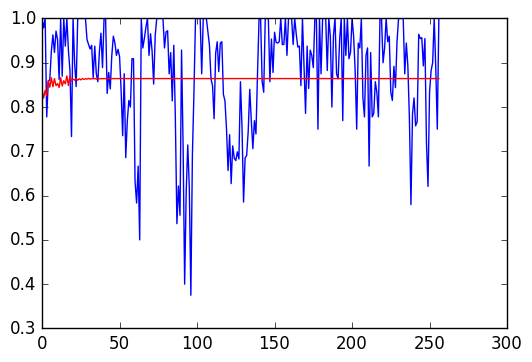

Test MSE: 0.015
Test RMSE: 0.123


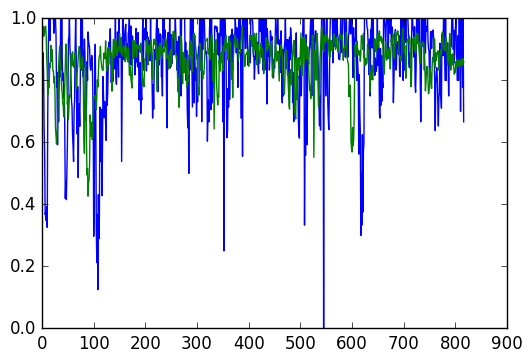

MSE of training set vs predictions2: 0.026
RMSE of training set vs predictions2: 0.160
Difference between the mean of our test set and our predictions: 0.018


In [106]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error
from random import randint

seed = randint(0, 100)
X = series.values
train_size = int(len(X)*0.7)
train, test = X[1: train_size], X[train_size + seed:]

#train autoregression
model = AR(train)
model_fit = model.fit()
print('Lag: %s'% model_fit.k_ar)
print('Coefficients: %s' % model_fit.params)

#make predictions on the test sample
predictions = model_fit.predict(start = len(train), end = len(train)+len(test)-1, dynamic=False)

#make predictions on the WHOLE training set
predictions2 = model_fit.predict(start = model_fit.k_ar, end = len(train) + model_fit.k_ar-1, dynamic=False)

# for i in range(len(predictions)):
#     print('predicted=%f, expected=%f' %(predictions[i], test[i]))
error = mean_squared_error(test, predictions)
sqrterror= np.sqrt(error)

#compute RMSE on the whole Traininig set
error2 = mean_squared_error(train, predictions2)
sqrterror2 = np.sqrt(error2)

#Plot predictions on test set vs actual result of our test set
plt.plot(test)
plt.plot(predictions, color = 'red')
plt.show()
print('Test MSE: %.3f' %error)
print('Test RMSE: %.3f'%sqrterror)

#Plot predictions on training set vs actual result of our training set
plt.plot(train)
plt.plot(predictions2, color = 'green')
plt.show()
print('MSE of training set vs predictions2: %.3f' %error2)
print('RMSE of training set vs predictions2: %.3f'%sqrterror2)

#Compare the difference between the means of our test set and our predictions
meandiff = test.mean() - predictions.mean()
print('Difference between the mean of our test set and our predictions: %.3f' % meandiff)







In [5]:
#split dataset
seed= randint(0, 500)
splitpoint = int(len(series) - seed)
dataset, validation = X[0:splitpoint], X[splitpoint:]
print('Dataset %d, Validation %d' % (len(dataset), len(validation)))


Dataset 1026, Validation 143


# ARIMA Model- Making one-step and multi-step out-of-sample predictions

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                 1161
Model:                 ARIMA(5, 1, 1)   Log Likelihood                 450.652
Method:                       css-mle   S.D. of innovations              0.164
Date:                Thu, 06 Jul 2017   AIC                           -885.304
Time:                        11:48:20   BIC                           -844.848
Sample:                             1   HQIC                          -870.039
                                                                              
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          0.0007      0.002      0.267      0.789        -0.004     0.005
ar.L1.D.y     -1.1155      0.042    -26.453      0.000        -1.198    -1.033
ar.L2.D.y     -0.5172      0.045    -11.451      0.0

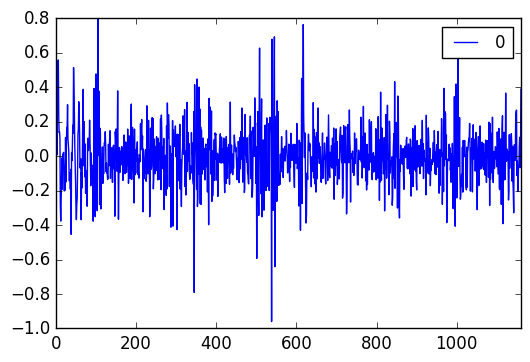

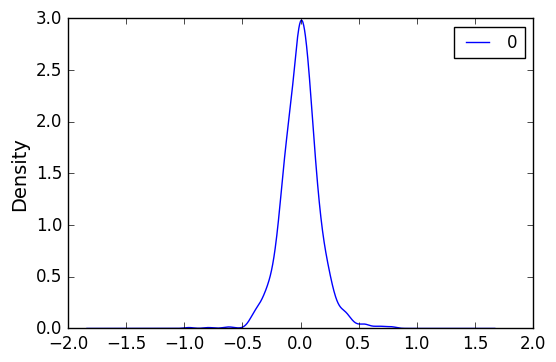

0.164189753033
Day 1: 0.544388
Day 2: 0.967323
Day 3: 0.889703
Day 4: 0.840528
Day 5: 0.810174
Day 6: 1.039791
Day 7: 0.628713


0.22382392440909071

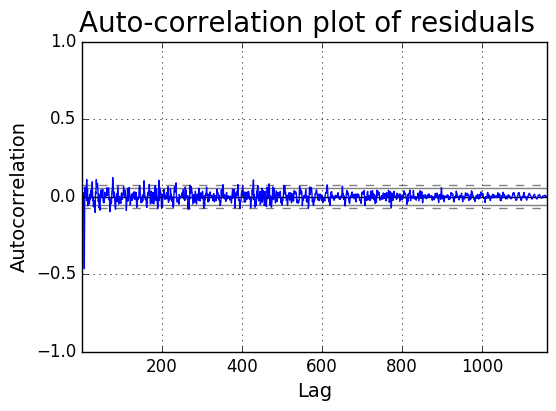

In [145]:
#created a difference series
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima_model import ARMA
from sklearn.metrics import mean_squared_error
from numpy import linalg as LA

import numpy

days = 7

#create a difference series
def difference(dataset, interval = 1):
    diff=list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i-interval]
        diff.append(value)
    return numpy.array(diff)

differenced = difference(X, days) #weekly difference

#define the predicted values in the future
def inverse_difference(history, yhat, interval=days):
    return yhat + history[-interval]

#fit model
model = ARIMA(differenced, order = (5,1,1))
model_fit = model.fit(disp=0)
print(model_fit.summary())

#one-step out-of-sample forecast
forecast = model_fit.forecast()[0]

#invert the difference of forecast to something usable
forecast = inverse_difference(X, forecast, days)
print('forecast %.3f' % forecast)

#residual errors
residuals = DataFrame(model_fit.resid)
#computing RMSE
RMSE = (LA.norm(residuals))/(len(residuals)**0.5)

#Plot residuals
residuals.plot()
residuals.plot(kind='kde')
plt.show(), print(RMSE)

fig = plt.figure()
autocorrelation_plot(residuals)
fig.suptitle('Auto-correlation plot of residuals', fontsize=20)

#one-week out-of-sample forecast
forecast2 = model_fit.predict(start = len(differenced), end = len(differenced)+6)

#invert the difference of forecast to something usable
history = [x for x in train]
day=1
for yhat in forecast2:
    inverted = inverse_difference(history, yhat, days)
    print('Day %d: %f' %(day, inverted))
    history.append(inverted)
    day +=1

err = mean_squared_error(history[len(train):], test[8:15])
np.sqrt(err)
